In [1]:
!gdown --id 11hnbngANUVuUaV385XPnyu1qO2LgSlg9

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=11hnbngANUVuUaV385XPnyu1qO2LgSlg9
To: /content/StudentPerformanceFactors.csv
100% 642k/642k [00:00<00:00, 7.70MB/s]


       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

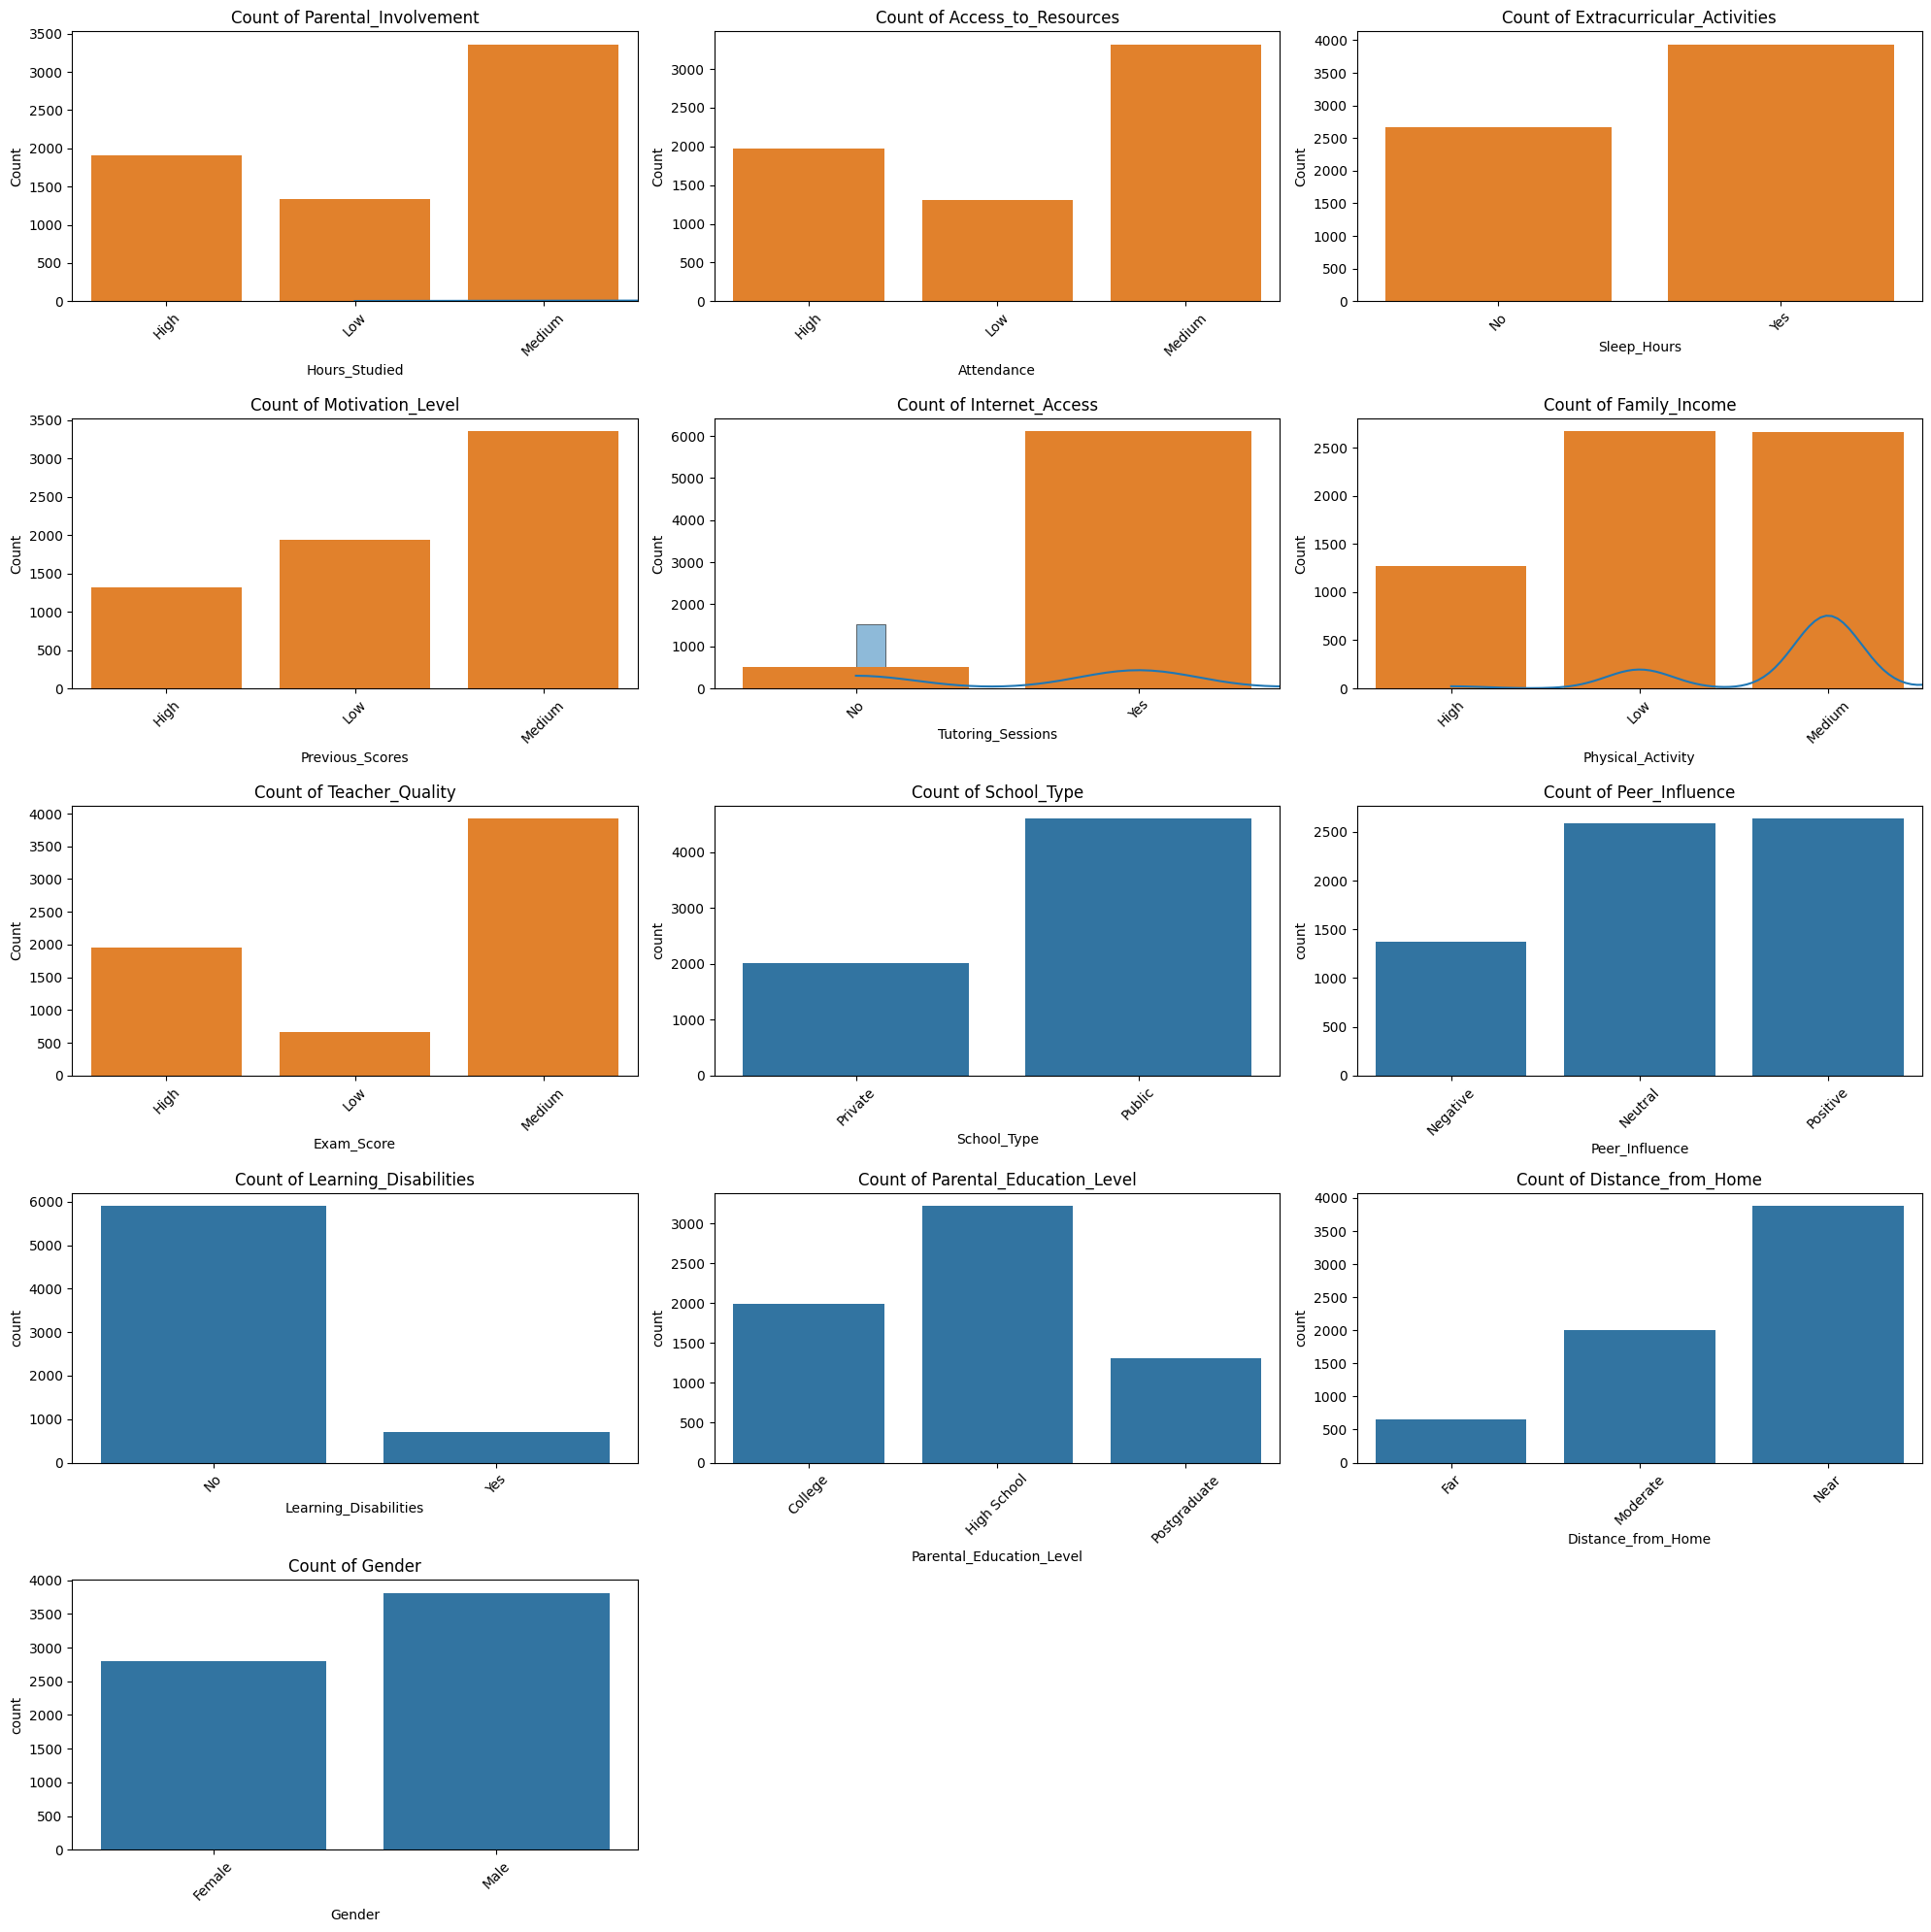

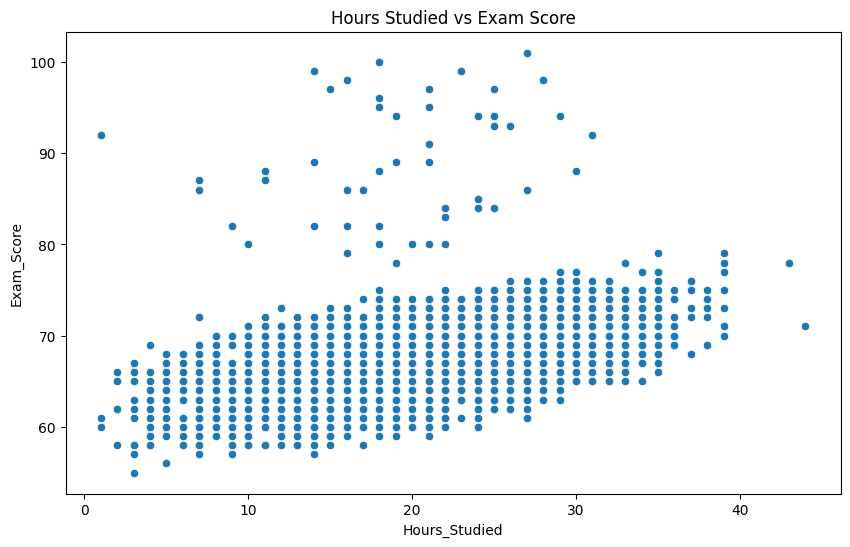

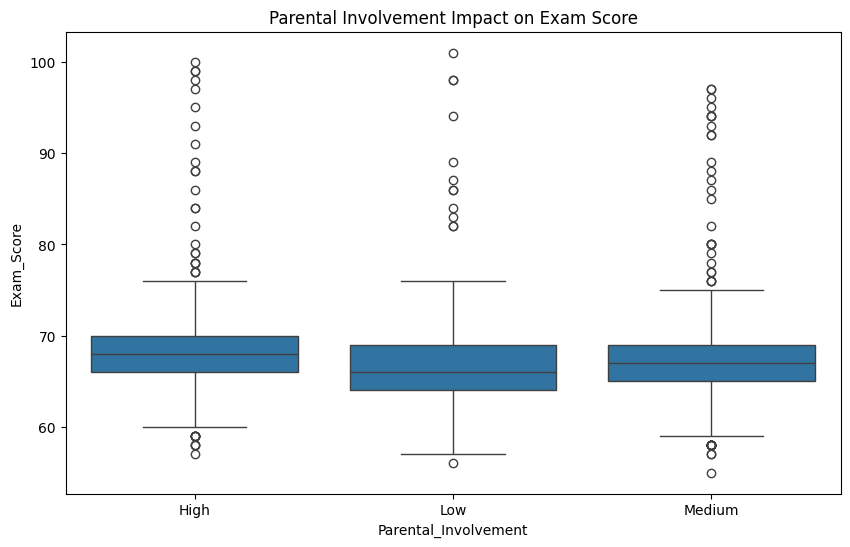

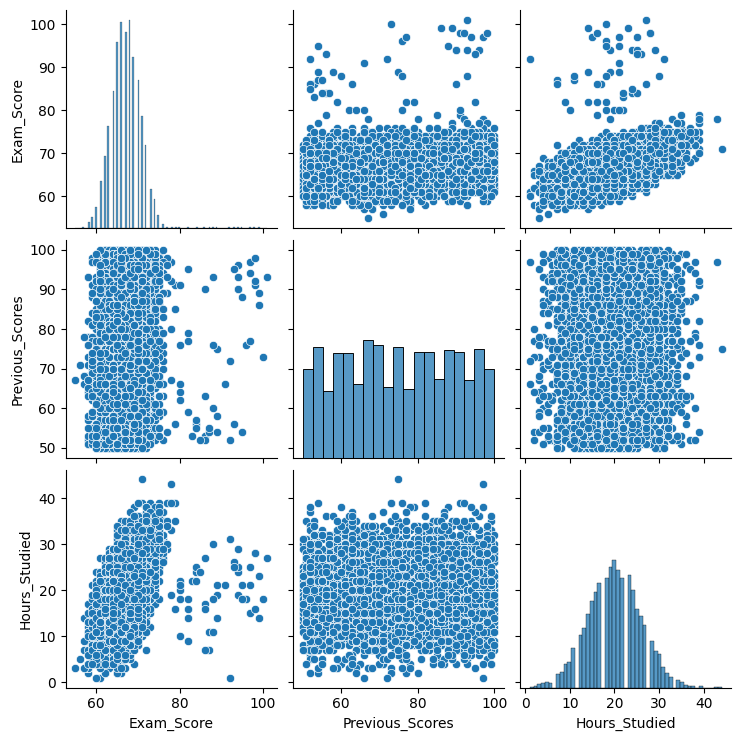

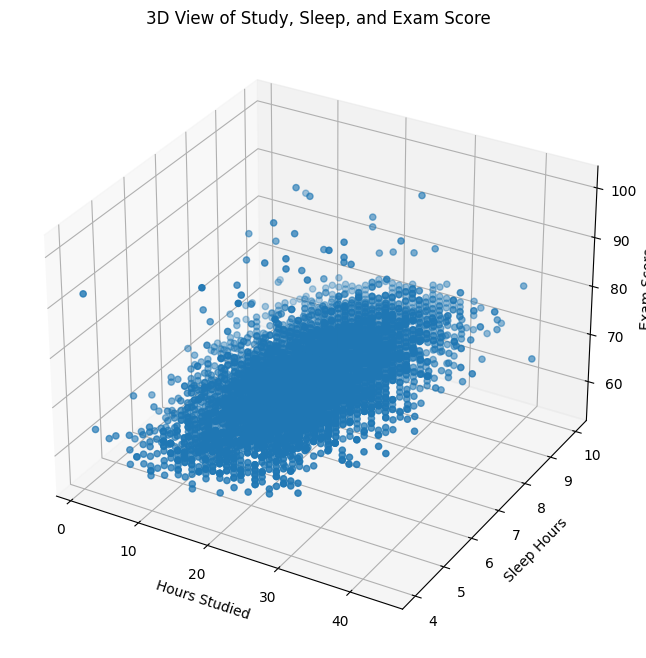

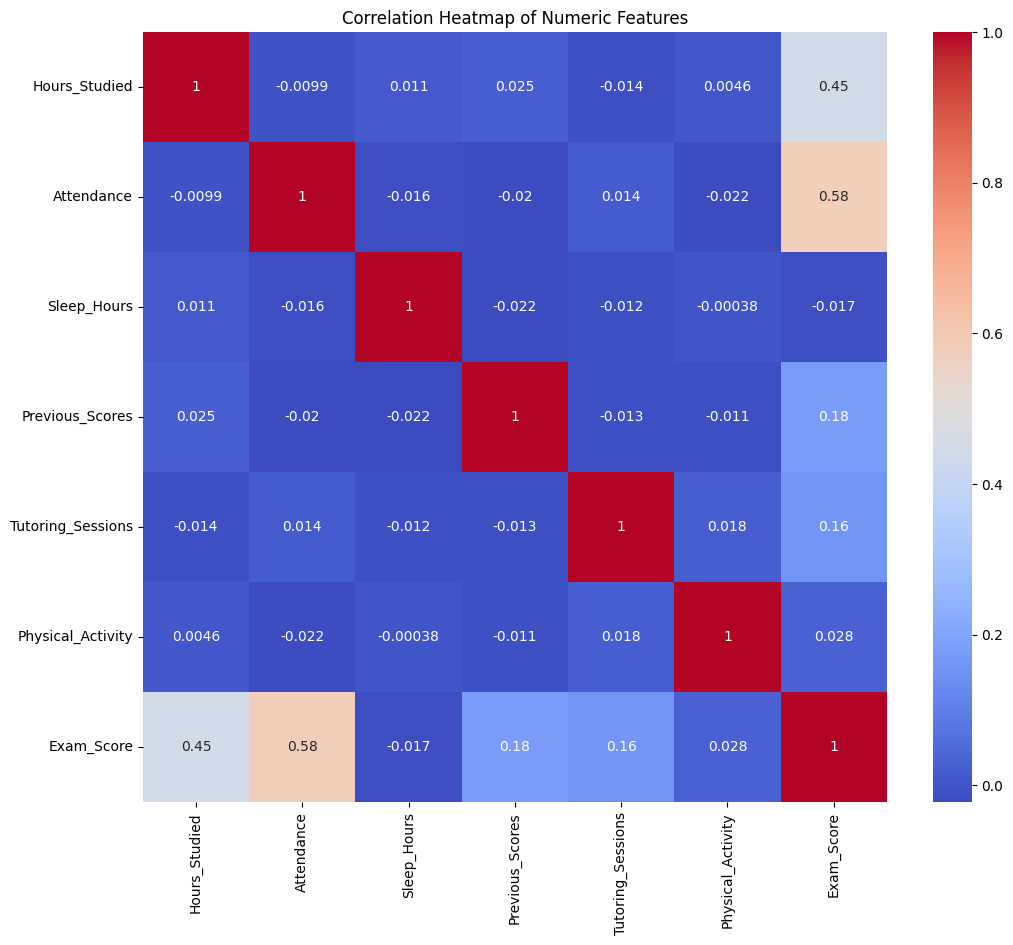

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc

# Assuming the data is in a CSV file named 'student_performance.csv'
data = pd.read_csv('/content/StudentPerformanceFactors.csv')

# Convert categorical data to category type for better handling in visualizations
for column in data.select_dtypes(include=['object']).columns:
    data[column] = data[column].astype('category')

# Descriptive Statistics
print(data.describe())

def plot_univariate():
    plt.figure(figsize=(20, 20))

    # Numerical Variables
    for i, col in enumerate([col for col in data.columns if data[col].dtype in ['int64', 'float64']], 1):
        plt.subplot(5, 3, i)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col}')

    # Categorical Variables
    # Reset the counter i for the second loop
    for j, col in enumerate([col for col in data.columns if data[col].dtype == 'category'], 1):
        plt.subplot(5, 3, j)
        sns.countplot(x=col, data=data)
        plt.title(f'Count of {col}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

# Bivariate Analysis
def plot_bivariate():
    # Scatter plot for Hours Studied vs Exam Score
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
    plt.title('Hours Studied vs Exam Score')
    plt.show()

    # Box plot for Parental Involvement vs Exam Score
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data)
    plt.title('Parental Involvement Impact on Exam Score')
    plt.show()

# Multivariate Analysis
def plot_multivariate():
    # Pair plot
    sns.pairplot(data[['Exam_Score', 'Peer_Influence', 'Previous_Scores', 'Hours_Studied']])
    plt.show()

    # 3D Scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data['Hours_Studied'], data['Sleep_Hours'], data['Exam_Score'])
    ax.set_xlabel('Hours Studied')
    ax.set_ylabel('Sleep Hours')
    ax.set_zlabel('Exam Score')
    plt.title('3D View of Study, Sleep, and Exam Score')
    plt.show()

# Heatmap for correlation
def plot_heatmap():
    plt.figure(figsize=(12, 10))

    # Select only numerical features for correlation calculation
    numerical_data = data.select_dtypes(include=['int64', 'float64'])

    sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

# Interactive Dashboard
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.H1('Student Performance Dashboard'),
    dcc.Dropdown(
        id='xaxis-column',
        options=[{'label': i, 'value': i} for i in ['Teacher_Quality', 'Parental_Education_Level', 'Gender']],
        value='Teacher_Quality'
    ),
    dcc.Graph(id='indicator-graphic')
])

@app.callback(
    Output('indicator-graphic', 'figure'),
    Input('xaxis-column', 'value'))
def update_graph(xaxis_column_name):
    fig = px.box(data, x=xaxis_column_name, y="Exam_Score", color=xaxis_column_name,
                 title=f"Exam Score Distribution by {xaxis_column_name}")
    return fig

if __name__ == '__main__':
    plot_univariate()
    plot_bivariate()
    plot_multivariate()
    plot_heatmap()
    # Comment out the next line if you don't want to run the dashboard
    app.run_server(debug=True)